In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('dados_corrente.xlsx')

In [ ]:
df

,fonte_esp,fonte_real,mirror_esp,mirror_real,total_esp,total_real
0,2.83,2.8344,0.0,0.0000,0.00,0.0000
1,2.83,2.8316,2.8,2.8422,2.83,2.8423
2,2.83,2.8289,2.8,2.8296,5.66,5.6684
3,2.83,2.8262,2.8,2.8264,8.49,8.4892
4,2.83,2.8235,2.8,2.8236,11.32,11.3045
5,2.83,2.8208,2.8,2.8208,14.15,14.1145
6,2.83,2.8181,2.8,2.8181,16.98,16.9190
7,2.83,2.8154,2.8,2.8154,19.81,19.7181
8,2.83,2.8127,2.8,2.8127,22.64,22.5124
9,2.83,2.8100,2.8,2.8100,25.47,25.3112


In [ ]:
x = np.arange(len(df))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
x_min = np.max(x)


Criaremos o primeiro plot referente à fonte esp e fonte real X entrada

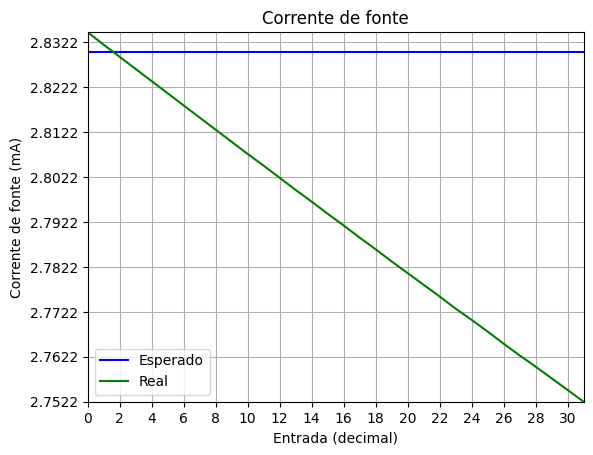

In [ ]:
plt.plot(x,df['fonte_esp'],color='b')
plt.plot(x,df['fonte_real'],color='g')

x_min = np.min(x)
x_max = np.max(x)


plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, 2))

y_min1 = np.min(df['fonte_esp'])
y_max1 = np.max(df['fonte_esp'])

y_min2 = np.min(df['fonte_real'])
y_max2 = np.max(df['fonte_real'])

MIN = np.min( [y_min1, y_min2] )
MAX = np.max( [y_max1, y_max2] )


plt.ylim(MIN, MAX)
plt.yticks(np.arange(MIN, MAX, .01))

plt.xlabel("Entrada (decimal)")
plt.ylabel("Corrente de fonte (mA)")
plt.title("Corrente de fonte")
plt.legend(['Esperado','Real'])
plt.grid()
plt.show()

In [ ]:
ratio = np.array([df['mirror_real'][i]/df['fonte_real'][i] for i in range(len(x))])

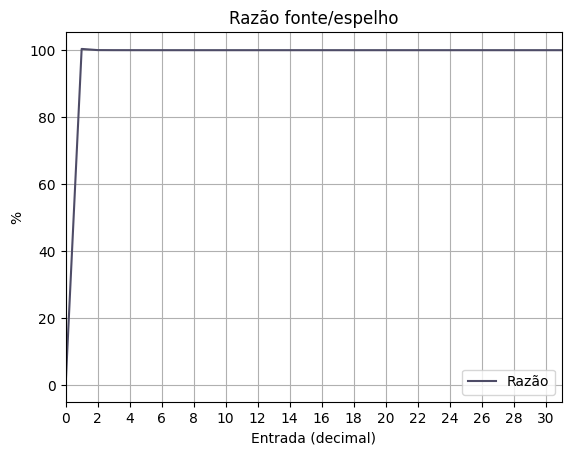

In [ ]:
plt.plot(x,(ratio)*100,color='#4E4C67')

x_min = np.min(x)
x_max = np.max(x)

plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, 2))

plt.xlabel("Entrada (decimal)")
plt.ylabel("%")
plt.title("Razão fonte/espelho")
plt.legend(['Razão'], loc='lower right')
plt.grid()
plt.show()

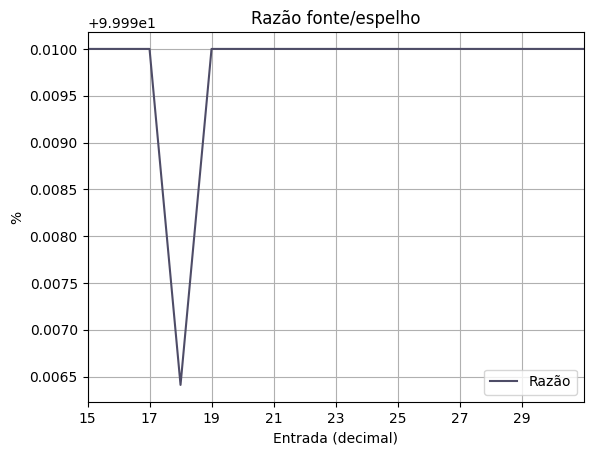

In [ ]:
plt.plot(x[15:],(100*ratio[15:]),color='#4E4C67')

x_min = np.min(x[15:])
x_max = np.max(x[15:])

plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, 2))

plt.xlabel("Entrada (decimal)")
plt.ylabel("%")
plt.title("Razão fonte/espelho")
plt.legend(['Razão'], loc='lower right')
plt.grid()
plt.show()

In [ ]:
dnl = df['total_esp'] - df['total_real']

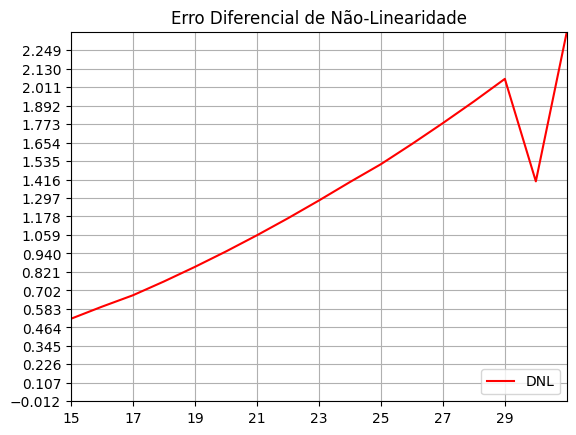

In [ ]:
plt.plot(x,dnl,color='r')

plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, 2))

plt.ylim(np.min(dnl), np.max(dnl))
plt.yticks(np.arange(np.min(dnl), np.max(dnl), (np.max(dnl)-np.min(dnl))/20))

plt.title("Erro Diferencial de Não-Linearidade")
plt.legend(['DNL'],loc='lower right')
plt.grid()
plt.show()


In [ ]:
inl = np.cumsum(dnl)

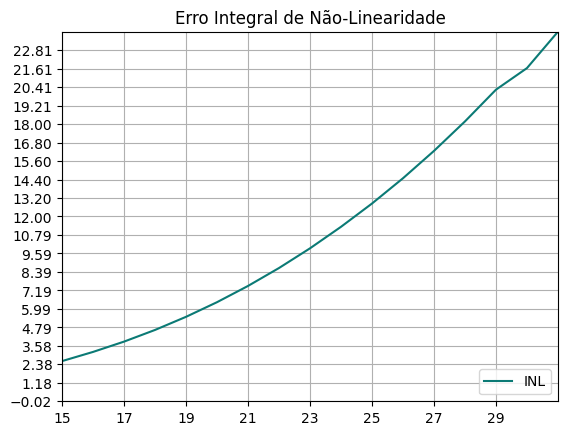

In [ ]:
plt.plot(x,inl,color='#0B7A75') #hexadecimal de uma cor

plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, 2))

plt.ylim(np.min(inl), np.max(inl))
plt.yticks(np.arange(np.min(inl), np.max(inl),(np.max(inl)-np.min(inl))/20))

plt.title("Erro Integral de Não-Linearidade")
plt.legend(['INL'],loc='lower right')
plt.grid()
plt.show()

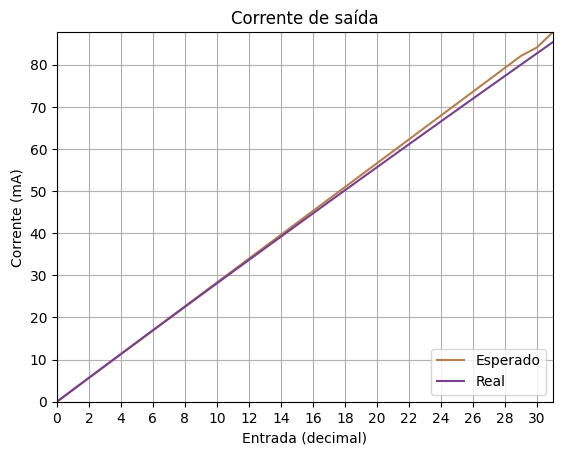

In [ ]:
plt.plot(x,df['total_esp'],color='#B57F50')
plt.plot(x,df['total_real'],color='#783F8E')

x_min = np.min(x)
x_max = np.max(x)


plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, 2))

y_min3 = np.min(df['total_esp'])
y_max3 = np.max(df['total_esp'])

y_min4 = np.min(df['total_real'])
y_max4 = np.max(df['total_real'])

MIN = np.min( [y_min3, y_min4] )
MAX = np.max( [y_max3, y_max4] )


plt.ylim(MIN, MAX)
#plt.yticks(np.arange(MIN, MAX, .01))

plt.xlabel("Entrada (decimal)")
plt.ylabel("Corrente (mA)")
plt.title("Corrente de saída")
plt.legend(['Esperado','Real'], loc='lower right')
plt.grid()
plt.show()

In [ ]:
ratio_fixed = np.array([round(df['total_real'][i]/df['fonte_real'][0]) for i in range(len(x))])
ratio_according = np.array([round(df['total_real'][i]/df['fonte_real'][i]) for i in range(len(x))])

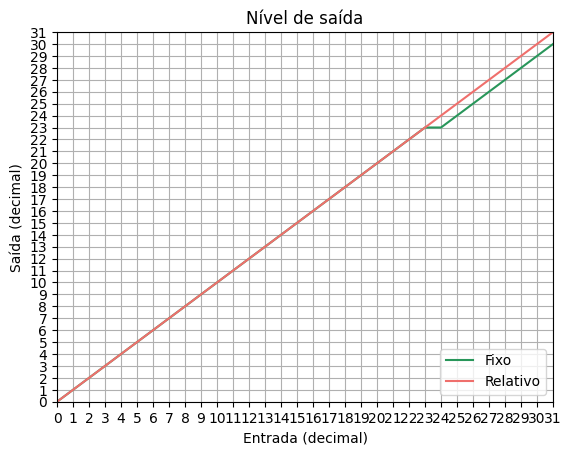

In [ ]:
plt.plot(x,ratio_fixed,color='#28965A')
plt.plot(x,ratio_according,color='#EF6F6C')


plt.xlim(0, 31)
plt.xticks(np.arange(0, 32,1))

plt.ylim(0, 31)
plt.yticks(np.arange(0, 32, 1))

plt.xlabel("Entrada (decimal)")
plt.ylabel("Saída (decimal)")
plt.title("Nível de saída")
plt.legend(['Fixo','Relativo'], loc='lower right')
plt.grid()
plt.show()